In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import glob
from keras.layers import Input, Lambda, Conv2D, MaxPooling2D, Flatten, Concatenate, Dense, BatchNormalization, Dropout
from keras.models import Model
from matplotlib import pyplot

Using TensorFlow backend.


In [39]:
all_files = glob.glob("data/*.csv")
li = []
for filename in all_files:
    print("Loading", filename)
    df = pd.read_csv(filename, header=None)
    df.drop(df.tail(1).index,inplace=True)
    li.append(df)

dataset = pd.concat(li, axis=0).sample(frac=1)
Y_data = dataset.iloc[:,-2:]
X_data = dataset.iloc[:,:-2]

Loading data/autopilot_2019_03_18__13_17_35.csv
Loading data/autopilot_2019_03_18__13_20_22.csv
Loading data/autopilot_2019_03_17__02_57_50.csv
Loading data/autopilot_2019_03_17__03_55_47.csv
Loading data/autopilot_2019_03_18__12_42_35.csv
Loading data/autopilot_2019_03_17__03_57_58.csv
Loading data/autopilot_2019_03_18__13_19_00.csv
Loading data/autopilot_2019_03_17__03_51_44.csv
Loading data/autopilot_2019_03_18__13_16_35.csv
Loading data/autopilot_2019_03_18__12_44_29.csv
Loading data/autopilot_2019_03_18__13_09_23.csv
Loading data/autopilot_2019_03_17__03_54_00.csv
Loading data/autopilot_2019_03_18__12_43_28.csv
Loading data/autopilot_2019_03_17__03_53_15.csv
Loading data/autopilot_2019_03_18__12_41_36.csv
Loading data/autopilot_2019_03_17__02_59_54.csv
Loading data/autopilot_2019_03_18__13_08_17.csv
Loading data/autopilot_2019_03_18__12_41_05.csv
Loading data/autopilot_2019_03_17__03_54_47.csv
Loading data/autopilot_2019_03_17__03_59_32.csv
Loading data/autopilot_2019_03_18__13_15

In [40]:
split_offset = int(X_data.shape[0] * .02)
Y_test  = Y_data.iloc[:split_offset,:]
Y_train = Y_data.iloc[split_offset:,:]
X_test  = X_data.iloc[:split_offset,:]
X_train = X_data.iloc[split_offset:,:]
assert X_train.shape[1] == X_test.shape[1]
assert Y_train.shape[1] == Y_test.shape[1]
assert X_train.shape[0] == Y_train.shape[0]
assert X_test.shape[0] == Y_test.shape[0]
print(X_train.shape[1], "feature values")
print(Y_train.shape[1], "output values")
print(X_train.shape[0], "training lines")
print(Y_test.shape[0], "testing lines")

2271 feature values
2 output values
41455 training lines
846 testing lines


In [41]:
first_selfcar_inputs = 3
features_by_car = 6
cells_by_row = 18
blocks_offset = first_selfcar_inputs + cells_by_row * cells_by_row * features_by_car

raw_input = Input(shape=(X_train.shape[1],), name='raw_input')

driving = Lambda(lambda x: tf.constant([[0.0, 0.6]]), output_shape=(2,))(raw_input)

In [42]:
model = Model(inputs=raw_input, outputs=driving)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
raw_input (InputLayer)       (None, 2271)              0         
_________________________________________________________________
lambda_7 (Lambda)            (None, 2)                 0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, Y_train, epochs=2, batch_size=64, validation_data=(X_test, Y_test))

Train on 41455 samples, validate on 846 samples
Epoch 1/2
41455/41455 [==============================] - 4s 88us/step - loss: 0.2041 - acc: 0.7326 - val_loss: 0.2153 - val_acc: 0.7210
Epoch 2/2
41455/41455 [==============================] - 4s 89us/step - loss: 0.2041 - acc: 0.7326 - val_loss: 0.2153 - val_acc: 0.7210


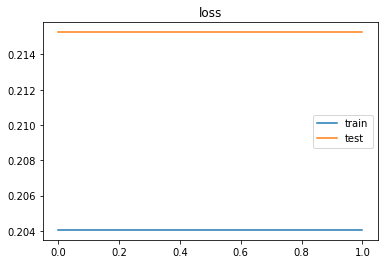

In [44]:
pyplot.title('loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

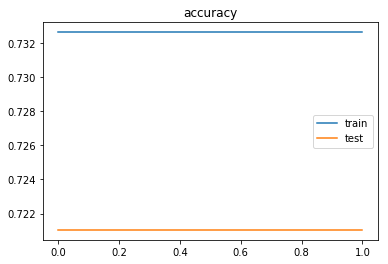

In [45]:
pyplot.title('accuracy')
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()

In [38]:
for index in range(0, 10):
    print(Y_test.values[index])
    print(model.predict(X_test.values[index:index+1,:])[0])
    print("---------")

[0.21243035 0.60419044]
[0.  0.6]
---------
[0.37810288 0.5276203 ]
[0.  0.6]
---------
[-0.33834736  0.51307368]
[0.  0.6]
---------
[0.72426684 0.58323133]
[0.  0.6]
---------
[0.42407507 0.60178645]
[0.  0.6]
---------
[0.46857837 0.69936132]
[0.  0.6]
---------
[-0.58100932  0.56240626]
[0.  0.6]
---------
[-0.16157346  0.09941968]
[0.  0.6]
---------
[-0.2723134   0.31195986]
[0.  0.6]
---------
[ 0.65924831 -0.51144886]
[0.  0.6]
---------
